In [1]:
import rasterio
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
sns.set_context('talk')

def rastersstats_to_dict(dir):

    rstr_dict = {}
    file_list = glob.glob(str(dir) + '*.tif')

    for f in file_list:

        rstr_dict[f] = {}
        src = rasterio.open(f)
        rstr_dict[f]['arr'] = src.read(1)
        rstr_dict[f]['mu'] = np.nanmean(rstr_dict[f]['arr'])
        rstr_dict[f]['sigma'] = np.nanstd(rstr_dict[f]['arr'])
        rstr_dict[f]['CV'] = rstr_dict[f]['sigma'] / rstr_dict[f]['mu']
        rstr_dict[f]['year'] = re.findall('(\d{4})', f)

    return rstr_dict

d1 = rastersstats_to_dict('../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/')
d2 = rastersstats_to_dict('../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/')
d = {**d1, **d2}
print(d.keys())

dict_keys(['../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/hv_wt_and_lake_depth_2012.tif', '../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/hv_wt_and_lake_depth_2016.tif', '../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/2012_v._2016_cwssim_arr.tif', '../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/2012_v._2016_nrmse_arr.tif', '../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/2012_v._2016_gms_arr.tif', '../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/2012_v._2016_ssim_arr.tif'])


In [28]:
wanted_keys = ['../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/hv_wt_and_lake_depth_2012.tif',
               '../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/hv_wt_and_lake_depth_2016.tif',
               '../thesis/fidelity_analysis/results/hv_wt_and_lake/2012_v._2016/2012_v._2016_ssim_arr.tif']
dp = dict((k, d[k]) for k in wanted_keys if k in d)
dp

{'../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake/hv_wt_and_lake_depth_2012.tif': {'arr': array([[ 1.1232519e+00,  1.1298437e+00,  8.8143069e-01, ...,
           4.8573974e-01,  4.4710448e-01,  4.4249633e-01],
         [ 1.1473608e+00,  1.1925268e+00,  9.0676028e-01, ...,
           4.3724731e-01,  4.3450072e-01,  4.3724731e-01],
         [ 1.2278662e+00,  9.5970827e-01,  9.4228274e-01, ...,
           4.1014770e-01,  3.9635375e-01,  4.2076781e-01],
         ...,
         [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
           1.4222021e+00,  1.4164953e+00,  1.3883276e+00],
         [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
           1.4503393e+00,  1.4239721e+00,  1.4195776e+00],
         [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
           1.4666357e+00,  1.4262915e+00,  1.4634008e+00]], dtype=float32),
  'mu': -8.596664,
  'sigma': 304.71304,
  'CV': -35.445496,
  'year': ['2012']},
 '../thesis/gis/raster/hv/snow_depth/corrected/wt_and_lake

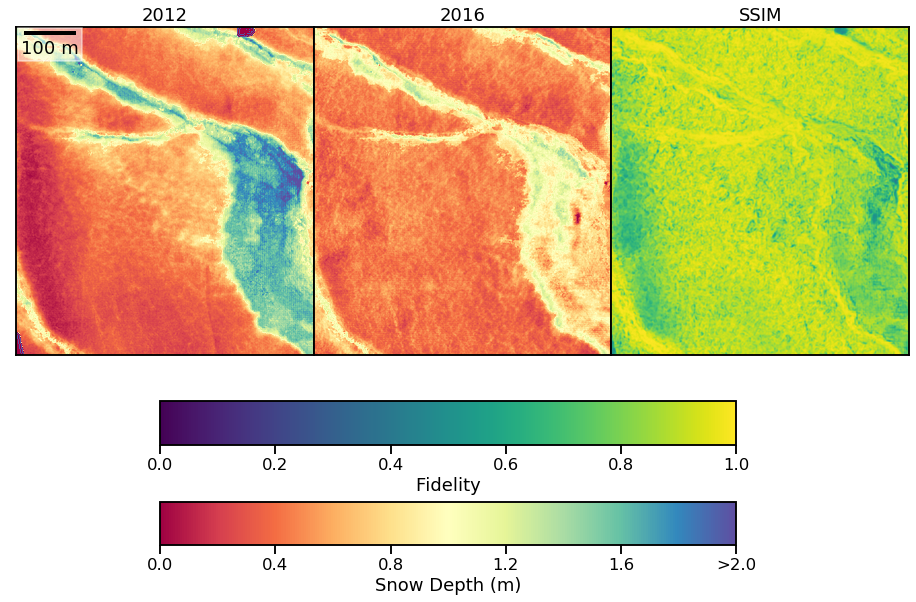

In [29]:
arrs = []
titles = ['2012', '2016', 'SSIM']
for k in dp.keys():
    arrs.append(dp[k]['arr'])

fig, axes = plt.subplots(figsize=(16, 10), nrows=1, ncols=3)

i=0

for t, a, ax in sorted(zip(titles, arrs, axes.flat), key = lambda x: x[0]):

    if t == '2012':
        im = ax.imshow(a, cmap='Spectral',
        interpolation='lanczos', vmin=0.0, vmax=2)
        scalebar = ScaleBar(1, box_alpha=0.5, location=2) # 1 pixel = 1 meter
        ax.add_artist(scalebar)

    if t == '2016':
        im = ax.imshow(a, cmap='Spectral',
        interpolation='lanczos', vmin=0.0, vmax=2)
    
    if t == "SSIM":
        im = ax.imshow(a, cmap='viridis', interpolation='lanczos', vmin=0.0, vmax=1)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t)
    
    i+=1

mp = axes[0].get_children()[-2]
mp2 = axes[-1].get_children()[-2]

cax = fig.add_axes([0.25, 0.01, 0.5, 0.06])
cbar=plt.colorbar(mappable=mp, cax=cax,
                  ticks = ([0, 0.4, 0.8, 1.2, 1.6, 2.0]),
                  orientation='horizontal')
cbar.set_label('Snow Depth (m)')
cbar.ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '>2.0'])


cax2 = fig.add_axes([0.25, 0.15, 0.5, 0.06])
cbar2 = plt.colorbar(mappable=mp2, cax=cax2,
                  ticks = ([0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                  orientation='horizontal')
cbar2.set_label('Fidelity')
cbar2.ax.set_xticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plt.savefig('f18_300.png', dpi=300, bbox_inches='tight')
# plt.savefig('f18_600.png', dpi=600, bbox_inches='tight')

In [34]:
np.sum(arrs[0] < 0.30) / arrs[0].size

0.16980334051724139

In [35]:
np.sum(arrs[1] < 0.30) / arrs[0].size

0.029226831896551723

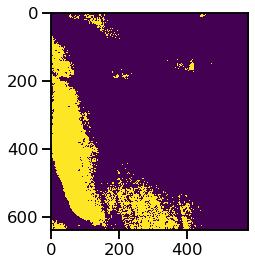

In [20]:
plt.imshow(arrs[0] < 0.3)

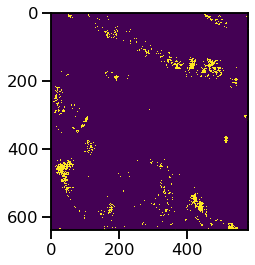

In [21]:
plt.imshow(arrs[1] < 0.3)